<a href="https://colab.research.google.com/github/bayuryunarko/belajar-sklearn/blob/main/3_Multiple_Linear_Regression_dan_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Latihan SKLearn dari channel Youtube "Indonesia Belajar"

##Sample Dataset

###Training Dataset

In [2]:
import pandas as pd

pizza = {
    'diameter' : [6, 8, 10, 14, 18],
    'n_topping' : [2, 1, 0, 2, 0],
    'harga' : [7, 9, 13, 17.5, 18]
}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


###Testing Dataset

In [3]:
pizza1 = {
    'diameter' : [8, 9, 11, 16, 13],
    'n_topping' : [2, 0, 2, 2, 0],
    'harga' : [11, 8.5, 15, 18, 11]
}

test_pizza_df = pd.DataFrame(pizza1)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,13,0,11.0


##Preprocessing Dataset

In [4]:
import numpy as np

In [8]:
X_train = np.array(train_pizza_df[['diameter', 'n_topping']]) #harus dalam format 2 dimensi
y_train = np.array(train_pizza_df['harga']) #harus dalam format 1 dimensi

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [9]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_train: \n{X_test}\n')
print(f'y_train: {y_test}')

X_train: 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [13  0]]

y_train: [11.   8.5 15.  18.  11. ]


##Multiple Linear Regression

Multiple Linear Regression merupakan generalisasi dari Simple Linear Regression yang memungkinkan untuk menggunakan beberapa explanatory variables.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'R2 Square : {r2_score(y_test, y_pred)}')

R2 Square : 0.6699192005330594


##Polynomial Regression

Polynomial Regression memodelkan hubungan antara independent variable x dan dependent variable y sebagai derajat polynomial dalam x

##Preprocessing Dataset

In [17]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1,1) #harus dalam format 2 dimensi
y_train = np.array(train_pizza_df['harga']) #harus dalam format 1 dimensi

print(f'X_train: \n{X_train}\n')
print(f'y_train: {y_train}')

X_train: 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train: [ 7.   9.  13.  17.5 18. ]


##Polynimial Regression : Quadratic

###Polynomial Features

In [18]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic: \n{X_train_quadratic}\n')

X_train_quadratic: 
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



###Training Model

In [19]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Visualisasi Model 

In [20]:
import matplotlib.pyplot as plt

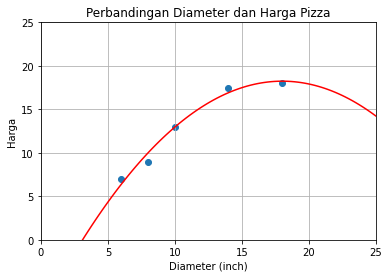

In [22]:
X_vis = np.linspace(0, 25, 100).reshape(-1,1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

##Polynomial Regression: Quadratic vs Cubic

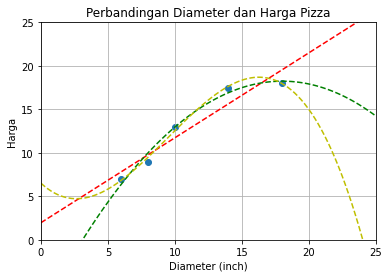

In [24]:
# Training Set
plt.scatter(X_train, y_train)

# Linear 
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1,1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis_quadratic, '--g', label='quadratic')

#Cubic
qubic_feature = PolynomialFeatures(degree=3)
X_train_qubic = qubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_qubic, y_train)
X_vis_cubic = qubic_feature.transform(X_vis)
y_vis_cubic = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis_cubic, '--y', label='cubic')


plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()